# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction:

### - Dataset Description:
Movies dataset from the movies database website that has basic movies information like title, release date, genre, budget, rating and runtime.
This data can be found online on the website www.themoviedb.org


### - Questions for Analysis:

#### 1- What are the most produced genres?
#### 2- What is production rate for most produced genres by year?
#### 3- What are the most popular movies?
#### 4- What are the most successful movies based on profit?
#### 5- What factors affect profits?
#### 6- Important facts to consider

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

### Overview

In [2]:
# Loading data and checking it
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Genres are seperated with | sign 

In [3]:
df.shape

(10866, 21)

In [4]:
df.duplicated('id').sum()
#Check for movie ID duplicates

1

In [5]:
df['id'].nunique()

10865

Dataset has duplicates that needs to be cleaned

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

No null values in the dataset

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Key findings:
#### First 75% of popularity count are less than 1 
#### First 50% of budget enteries 0 (which will affect the accuracy of the analysis)
#### First 75% of the runtime enteries are less than 111 minutes while the maximum run time is 900 minutes
#### First 75 of vote count enteries are less than 145 votes but the maximum vote count is 9767 votes
#### The release years in the dataset ranges from 1960 to 2015

### Data Cleaning

In [8]:
df.drop_duplicates(['id'], inplace = True)
#Deleting ID duplicates 

In [9]:
df.duplicated('id').sum()
#Check for movie ID duplicates

0

In [10]:
df.shape
#Checking again

(10865, 21)

In [11]:
df = df.drop(columns=['imdb_id','cast','homepage','tagline','keywords','overview','vote_count','budget_adj','revenue_adj'])
#Deleting irrelevant columns that will not be used in the analysis

In [12]:
df.head()
#Checking again

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.3,2015


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis



### 1- What are the most produced genres?

In [14]:
genre_list = df['genres'].str.cat(sep = '|')
genre_list = pd.Series(genre_list.split('|'))
genre_prod = genre_list.value_counts()

In [15]:
genre_prod

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

Visualising genre production in a better way:

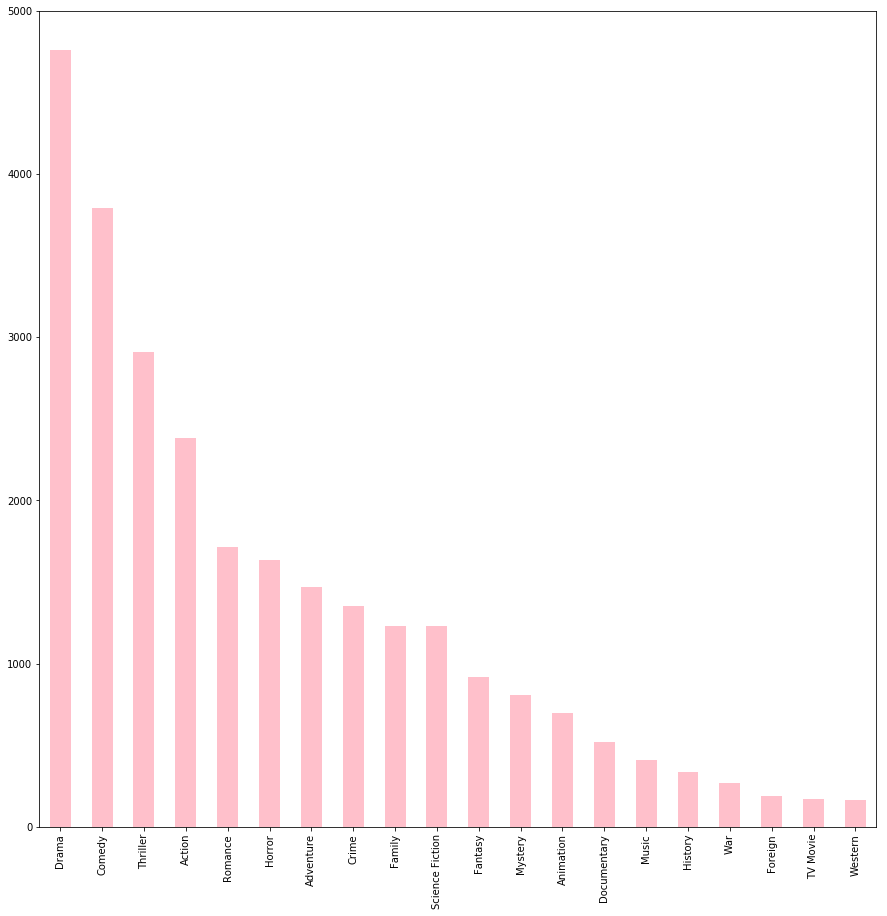

In [16]:
fig = plt.figure(figsize = (15, 15))
genre_prod.plot.bar(color='pink');

### 2- What is production rate for most produced genres by year?

In [17]:
def genre_production(genre):
    type = [genre]
    rslt_df = df[df['genres'].isin(type)].sort_values(by='release_date',ascending=False)
    x = rslt_df['release_year']
    y = rslt_df['id']
    fig = plt.figure(figsize = (25, 10))
    plt.barh(x,y)

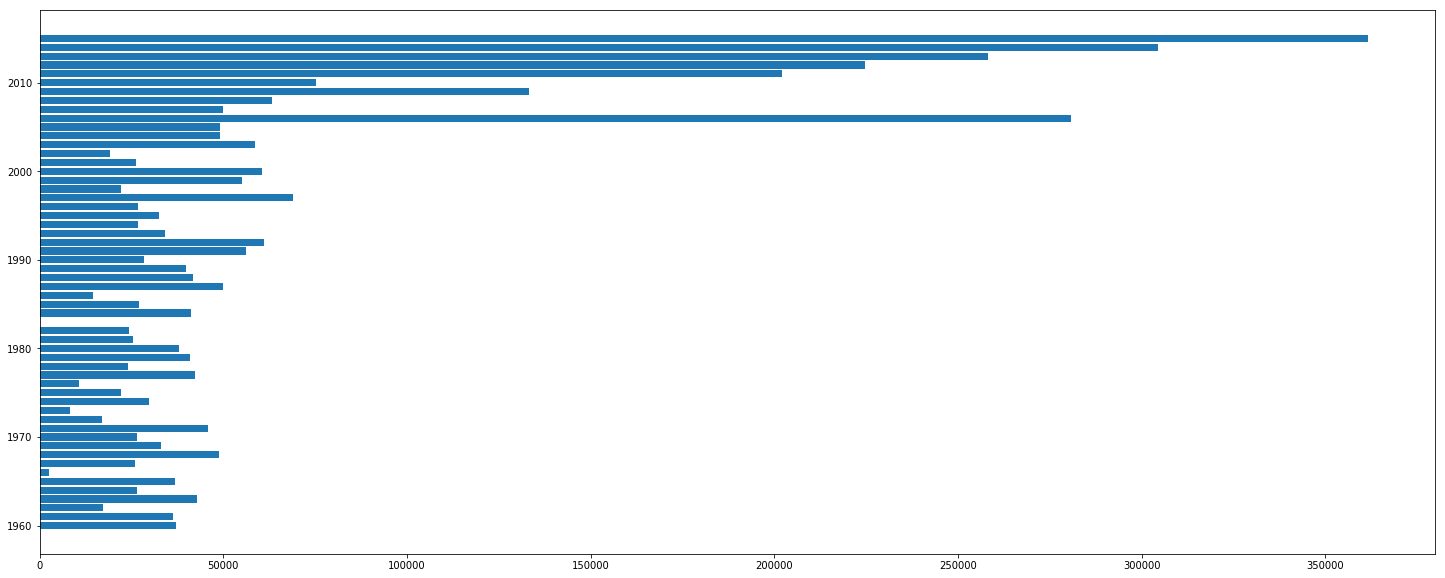

In [18]:
genre_production('Drama')

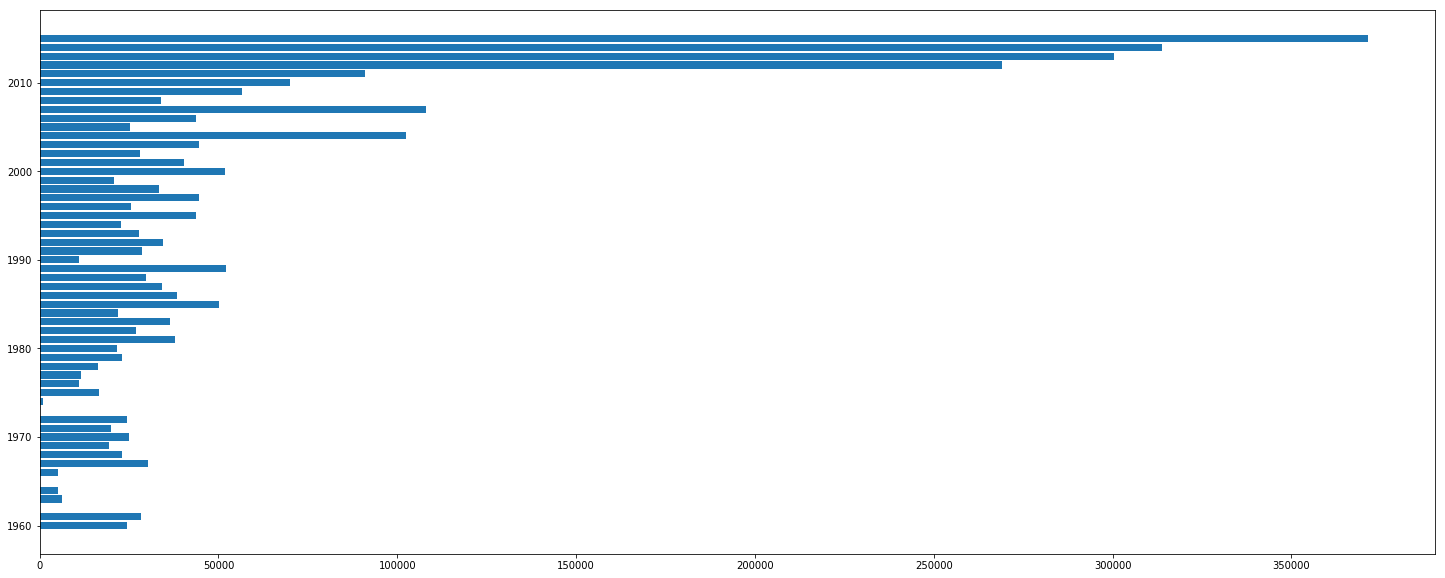

In [19]:
genre_production('Comedy')

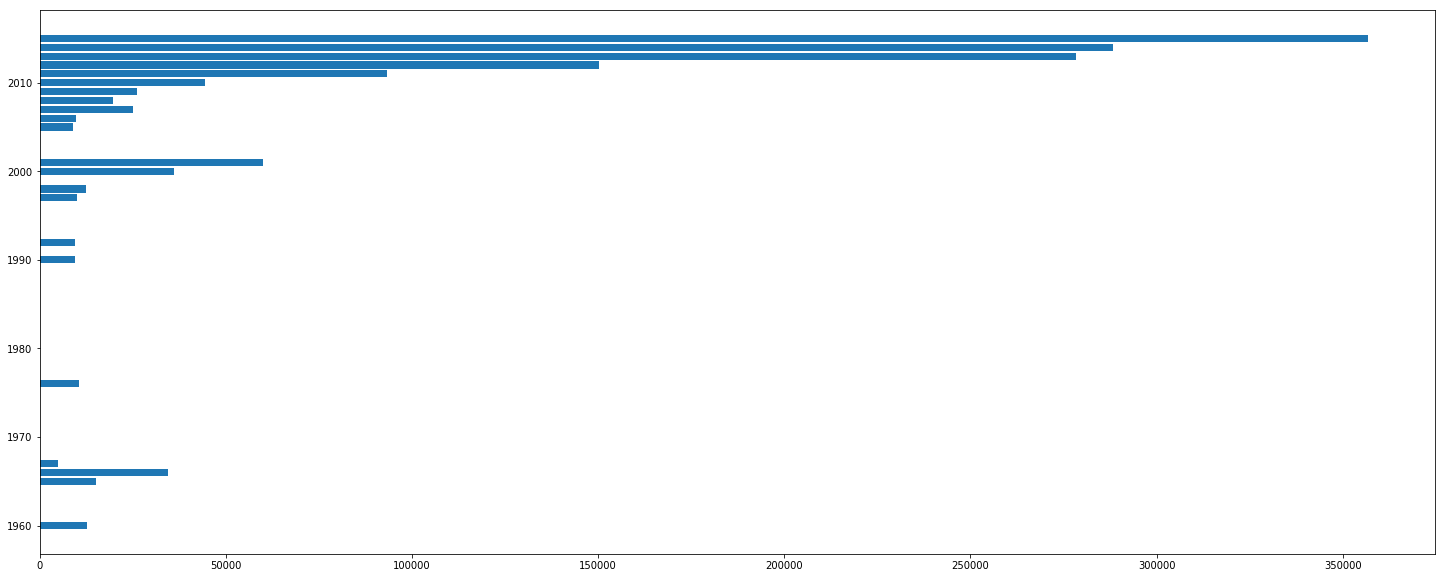

In [20]:
genre_production('Thriller')

### 3- What are the most popular movies?

In [21]:
most_pop = df.sort_values(by='popularity',ascending=False)
most_pop = most_pop[['original_title', 'popularity']]

In [22]:
most_pop.head(10)

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


In [23]:
def get_pie(DF,column,number,labels,title):
    ax = DF[column].head(number).plot.pie(labels=DF[labels].head(number),figsize=(15,15),autopct='%1.1f%%',legend=True,fontsize=15)
    plt.ylabel('')
    plt.title(title,fontsize=35);

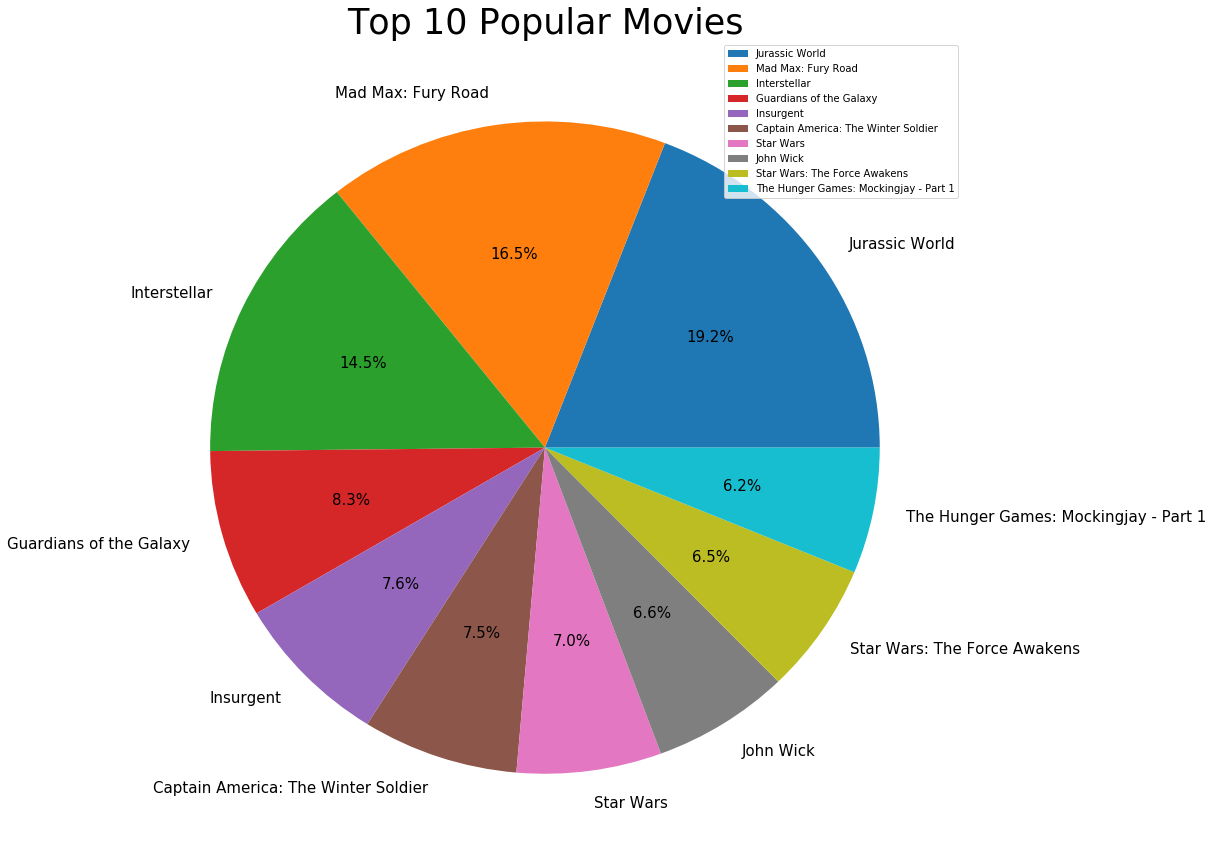

In [24]:
get_pie(most_pop,'popularity',10,'original_title','Top 10 Popular Movies')

### 4- What are the most successful movies based on profit?

In [25]:
df.insert(4,'profit',df['revenue']-df['budget'])

In [26]:
most_succ = df.sort_values(by='profit',ascending=False)
most_succ[['original_title','profit']].head(10)

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


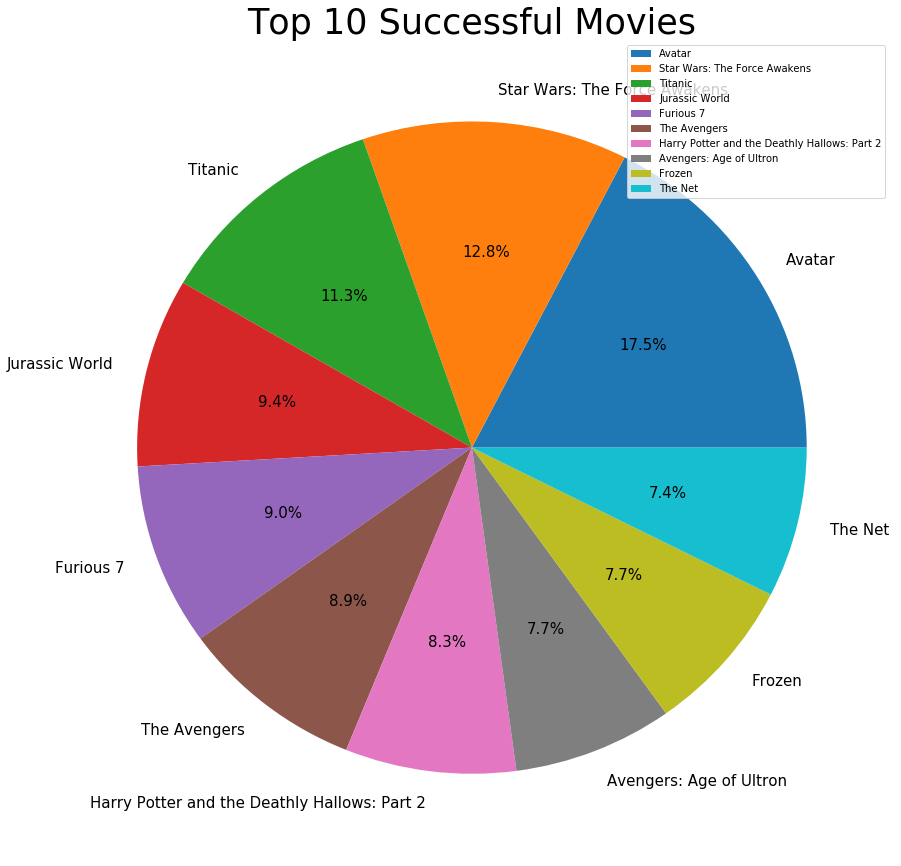

In [27]:
get_pie(most_succ,'profit',10,'original_title','Top 10 Successful Movies')

### 5- What factors affect profits?

In [28]:
df.describe()

,id,popularity,budget,revenue,profit,runtime,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,2.520261e+07,102.071790,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,9.659103e+07,31.382701,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,-4.139124e+08,0.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,9.092453e+06,111.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09,900.000000,9.200000,2015.000000


In [29]:
df_ = df.head(50)

In [30]:
def prof_relation(col,colr='blue'):
    df.plot.scatter(col,'profit',figsize=(10,10),color=colr);

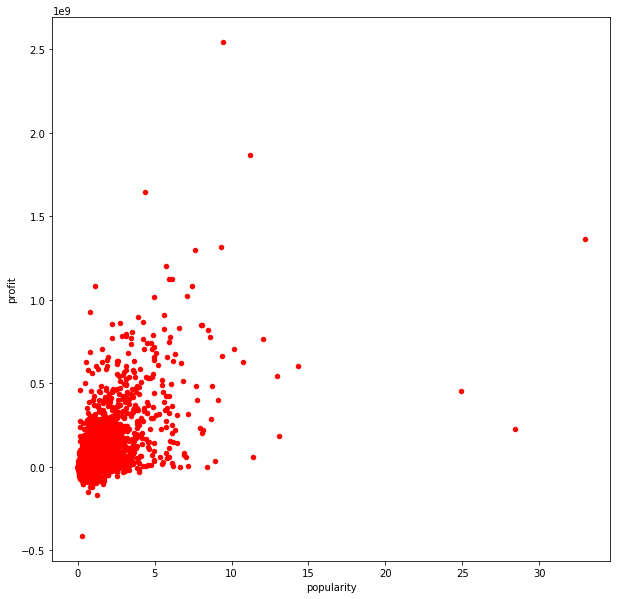

In [31]:
prof_relation('popularity','red')

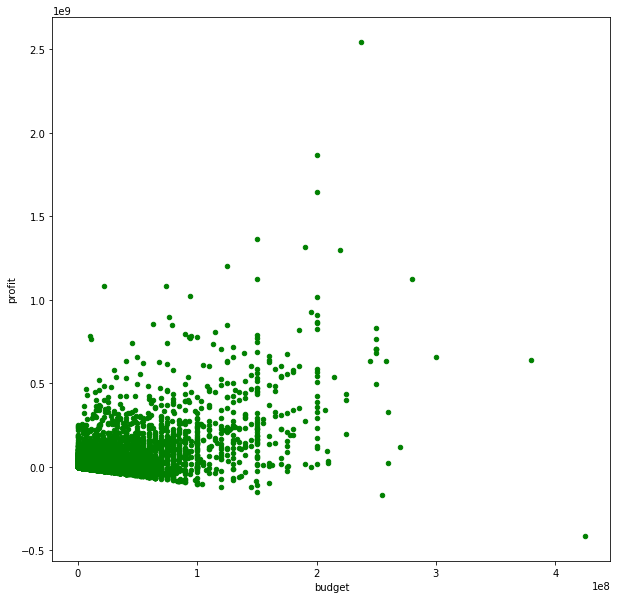

In [32]:
prof_relation('budget','green')

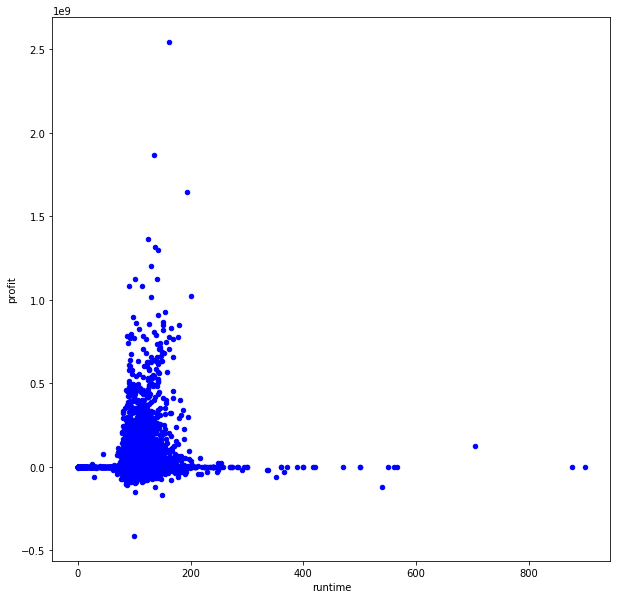

In [33]:
prof_relation('runtime')

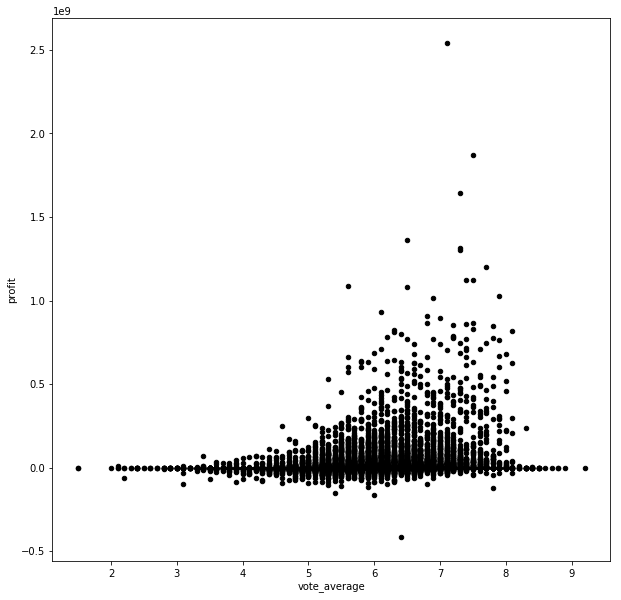

In [34]:
prof_relation('vote_average','black')

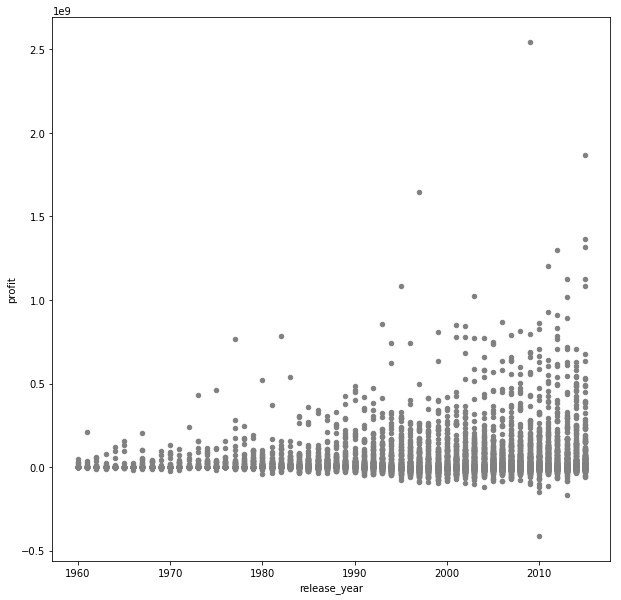

In [35]:
prof_relation('release_year','grey')

### 6- Important facts to consider:

In [36]:
dirc_votes = df[['director', 'vote_average','original_title']].sort_values(by='vote_average',ascending=False)
dirc_votes = dirc_votes.dropna()
dirc_votes.head(10)

,director,vote_average,original_title
3894,Mark Cousins,9.2,The Story of Film: An Odyssey
538,Jennifer Siebel Newsom,8.9,The Mask You Live In
1200,Carl Tibbetts,8.8,Black Mirror: White Christmas
2269,Derek Frankowski,8.8,Life Cycles
6911,David Mallet,8.7,Pink Floyd: Pulse
3690,Curt Morgan,8.5,The Art of Flight
8411,Saul Swimmer,8.5,Queen - Rock Montreal
8221,Martin Scorsese|Michael Henry Wilson,8.5,A Personal Journey with Martin Scorsese Throug...
8839,Stan Lathan,8.5,Dave Chappelle: Killin' Them Softly
5830,James Payne,8.5,Doctor Who: The Time of the Doctor


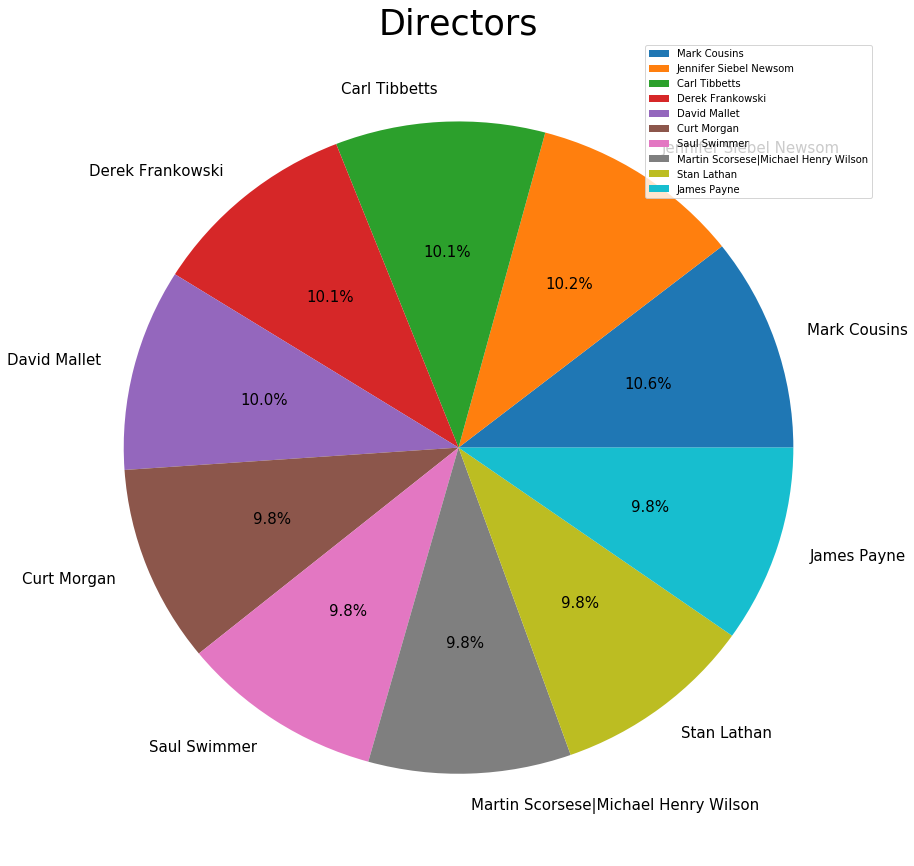

In [37]:
get_pie(dirc_votes,'vote_average',10,'director','Directors')

In [38]:
prod_comp = df['production_companies'].str.cat(sep = '|')
prod_comp = pd.Series(prod_comp.split('|'))
prod_comp = prod_comp.value_counts()
prod_comp.head(10)

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

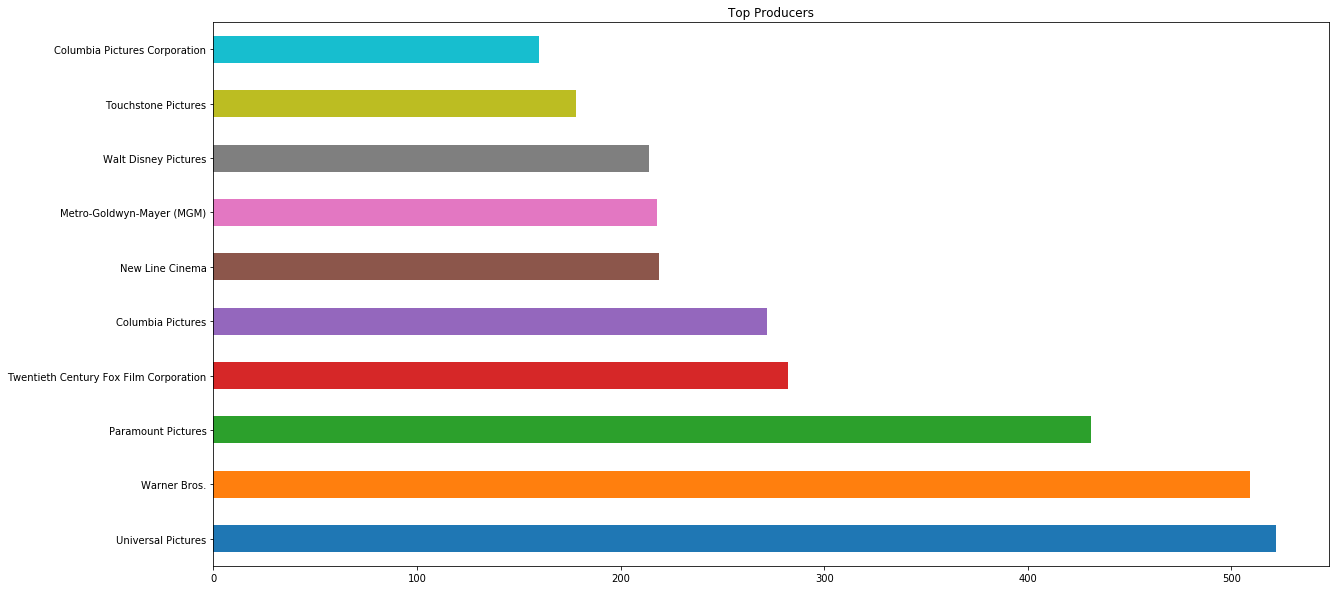

In [39]:
prod_comp.head(10).plot.barh(figsize=(20,10),title='Top Producers');

<a id='conclusions'></a>
## Conclusions

#### First 75% of popularity count are less than 1
#### First 50% of budget enteries 0 (which will affect the accuracy of the analysis)
#### First 75% of the runtime enteries are less than 111 minutes while the maximum run time is 900 minutes
#### First 75 of vote count enteries are less than 145 votes but the maximum vote count is 9767 votes
#### The release years in the dataset ranges from 1960 to 2015
#### Drama, comedy and thriller are the most produced genres 
#### The most produced genres are peaked in 2015
#### The most popular movies are Jurassic World, Mad Max and Interstellar
#### The most profitable movies are Avatar, Star Wars and Titanic
#### There is no relation between profit and popualrity, budget or runtime
#### There is a relation between vote average and profit as the most profitable movies averaged between 5 and 8 
#### Also there is a positive relation between release year and profit as the the later the year the more the profit 
#### The top rated directors are Mark Cousins, Jennifer Siebel and Carl Tibbetts 
#### The top movie producers with largest amount of movies produced are Universal Pictures, Warner bros and Paramount Pictures

### Most Affecting Limitations
###### Budgets and revenues has 0 values
###### Most vote counts doesn't reflect a reasonable population for an accurate number

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255